# **Tutorial 2: Exploring Sea Surface Temperature with OceanDataCatalog**

### **Description** 
- Jupyter Notebook demonstrating how to access & explore the eORCA1-ERA5v1 Near-Present-Day monthly mean sea surface temperature output (1976-2023) stored in Icechunk repositories using the OceanDataCatalog API.


In [1]:
# -- Importing Python libraries -- #
from OceanDataStore import OceanDataCatalog

### **Processing**

* Create an instance of the OceanDataCatalog class to access the National Oceanography Centre ocean model Spatio-Temporal Access Catalog (noc-model-stac):

In [2]:
catalog = OceanDataCatalog(catalog_name="noc-model-stac")

* Let's search the Near-Present Day collection for all ocean model outputs including the sea surface temperature (SST) variable tos_con:

In [3]:
catalog.search(collection='noc-npd', variable='tos_con')



            * Item ID: noc-npd/npd-eorca1-era5v1/gn_global/T1y
              Title: eORCA1 ERA5v1 NPD T1y Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global ocean physics annual mean outputs defined at T-points.
              Platform: gn_global
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2024-12-31T00:00:00Z
            

            * Item ID: noc-npd/npd-eorca1-era5v1/gn_global/T1m
              Title: eORCA1 ERA5v1 NPD T1m Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global ocean physics monthly mean outputs defined at T-points.
              Platform: gn_global
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2024-12-31T00:00:00Z
            

            * Item ID: noc-npd/npd-eorca025-era5v1/gn_global/T1y_3d
              Title: eORCA025 ERA5v1 NPD T1y_3d Icechunk repository
              Description: Icechunk repository contain

Next, we will open the annual-mean SST data from the 1-degree eORCA1 ERA5v1 simulation (second entry returned from our search) as an xarray Dataset by using the open_dataset() method:

In [ ]:
ds = catalog.open_dataset(id=catalog.Items[1].id,
                          variables=['tos_con'],
                          )
               
ds

<xarray.Dataset> Size: 282MB
Dimensions:        (time_counter: 588, y: 331, x: 360)
Coordinates:
    nav_lon        (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    nav_lat        (y, x) float64 953kB dask.array<chunksize=(331, 360), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] 5kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 5kB 1976-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x
Data variables:
    tos_con        (time_counter, y, x) float32 280MB dask.array<chunksize=(1, 331, 360), meta=np.ndarray>

### **Visualise**

* You'll notice that our SST output is returned as a lazy dataset comprised of dask arrays, meaning it is not yet loaded into memory.

* Only once we have performed operations on out outputs and call .load() or .plot() will we execute the resulting task graph on our local machine and load the final result into memory.

* Below we will compute a seasonal climatology of SST for the whole Near-Present-Day simulation (1976-2024) and plot this as four pcolormesh subplots.

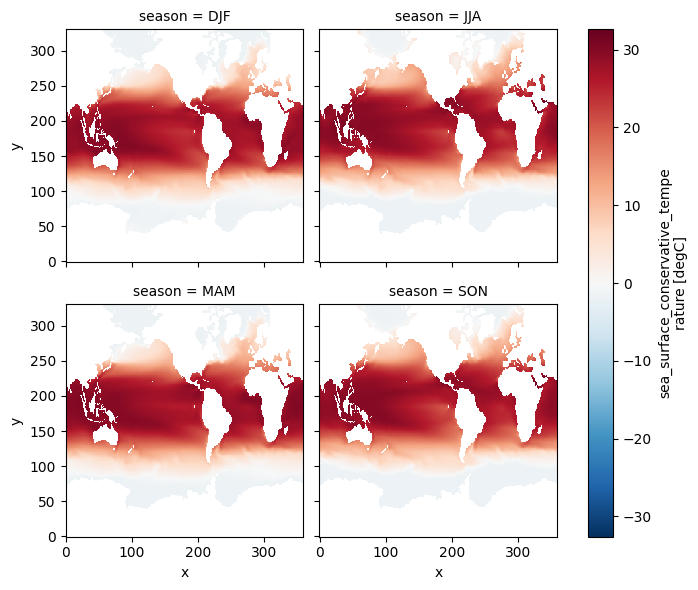

In [8]:
# -- Plot Seasonal Climatology of SST -- #
ds.tos_con.groupby("time_counter.season").mean().plot(col="season", col_wrap=2)